<a href="https://colab.research.google.com/github/ajayn3300/Book_Recommender-Collaborative---NLP/blob/main/Book%20Recommender%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Book Recommender System**

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# loading datasets
books=pd.read_csv(r'C:\Users\ajay\Desktop\data_book_recommendation\Books.csv')
ratings=pd.read_csv(r'C:\Users\ajay\Desktop\data_book_recommendation\ratings.csv')
users=pd.read_csv(r'C:\Users\ajay\Desktop\data_book_recommendation\users.csv')

C:\Users\ajay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# sample of datasets
books.head()
                  

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#book shape
books.shape

(271360, 8)

In [ ]:
#rating dataset sample
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.shape

(278858, 3)

**Missing- Values**

In [ ]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

**Duplicates**


In [ ]:
books.duplicated().sum(),users.duplicated().sum(),ratings.duplicated().sum()

(0, 0, 0)

            No duplicates


   # ***EDA***

In [ ]:
#merge whole dataset 
data=books.merge(ratings,on='ISBN')
data=data.merge(users,on='User-ID')

In [ ]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


Text(0, 0.5, '<<<< Ratings >>>>>')

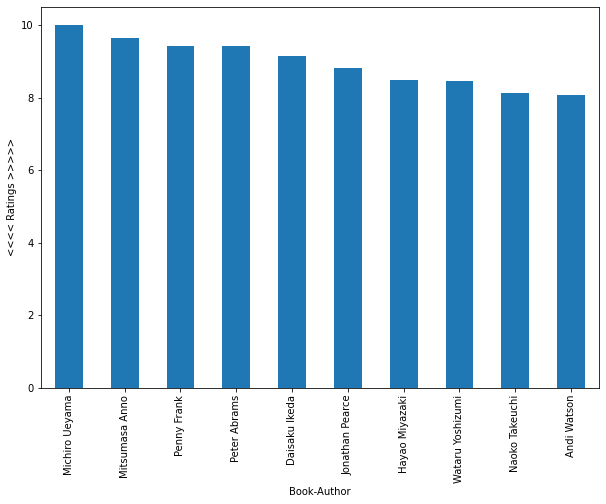

In [ ]:
# top 10 book authors
plt.figure(figsize=(10,7))
data.groupby('Book-Author').agg({'Book-Rating':'mean','User-ID':'count'})[data.groupby('Book-Author').agg({'Book-Rating':'mean','User-ID':'count'})['User-ID']>10].sort_values('Book-Rating',ascending=False).loc[:,'Book-Rating'].head(10).plot(kind='bar')
plt.ylabel('<<<< Ratings >>>>>')

Text(0, 0.5, 'no. of books ')

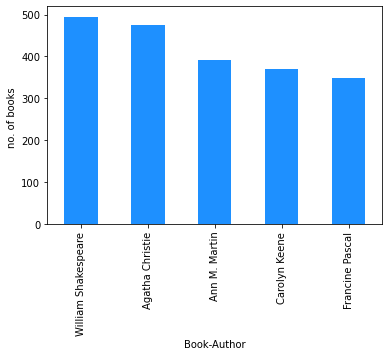

In [ ]:
# authors with most no. of books
data.groupby('Book-Author')['Book-Title'].nunique().sort_values(ascending=False).head(5).plot(kind='bar',color='dodgerblue')
plt.ylabel('no. of books ')


# Collborative filterng based on ratings

In [ ]:
# creating a new dataframe with average rating and numbers of rating per book
books_ratings=data.groupby('Book-Title')['Book-Rating'].agg(['mean','count']).reset_index().sort_values('mean',ascending=False)
books_ratings=books_ratings.rename(columns={'mean':'average_ratings','count':'no. of ratings'})



In [ ]:
books_ratings.shape

(241071, 3)

In [ ]:
# now we need some more features like book-author,Publisher,Image-URL-Lbko

books_ratings=books_ratings.merge(data,on='Book-Title').loc[:,['Book-Title','Book-Author','Publisher','Book-Rating','average_ratings','no. of ratings','Image-URL-L','User-ID']]



In [ ]:
books_ratings.head()

,Book-Title,Book-Author,Publisher,Book-Rating,average_ratings,no. of ratings,Image-URL-L,User-ID
0,Film Is: The International Free Cinema,Stephen Dwoskin,Overlook Press,10,10.0,1,http://images.amazon.com/images/P/0879510722.0...,86947
1,More Secrets of Happy Children: Embrace Your P...,Steve Biddulph,Marlowe &amp; Company,10,10.0,1,http://images.amazon.com/images/P/156924488X.0...,274301
2,Jo's Boys : From the Original Publisher,Louisa May Alcott,"Little, Brown",10,10.0,1,http://images.amazon.com/images/P/0316031038.0...,278221
3,The Vanished Priestess : An Annie Szabo Mystery,Meredith Blevins,Forge Books,10,10.0,1,http://images.amazon.com/images/P/0765307804.0...,98391
4,Game and Hunting,Kurt G. Bluchel,Konemann,10,10.0,1,http://images.amazon.com/images/P/3895084719.0...,60202


In [ ]:
books_ratings.shape

(1031136, 8)

         Now we will filter our data on the basis of two criteria which is :
                                 
                                                             1.User who has rated more than 150 books
                                                             2. Books which have more than 50 ratings

In [ ]:
#saving user id's of those who have rated at least 150 books

ids=ratings.groupby(['User-ID'])['Book-Rating'].count().reset_index()[ratings.groupby(['User-ID'])['Book-Rating'].count().reset_index()['Book-Rating']>=150]['User-ID']

In [ ]:
# Now let's filter our dataframe with user who have rated more than 150 books

books_ratings=books_ratings[(books_ratings['User-ID'].isin(ids))]

In [ ]:
# saving titles o those books which have more than 50 numbers of ratings
books_over_50=books_ratings.groupby(['Book-Title'])['no. of ratings'].count().reset_index()[
books_ratings.groupby(['Book-Title'])['no. of ratings'].count().reset_index()['no. of ratings'] >=50]['Book-Title']

In [ ]:
# filter dataframe with books which have at least 50 numbers of ratings
books_ratings=books_ratings[books_ratings['Book-Title'].isin(books_over_50)]

In [ ]:
#  let's check sample of dataframe 
books_ratings

,Book-Title,Book-Author,Publisher,Book-Rating,average_ratings,no. of ratings,Image-URL-L,User-ID
72790,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,0,5.852804,428,http://images.amazon.com/images/P/0439136350.0...,11676
72791,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,9,5.852804,428,http://images.amazon.com/images/P/0439136369.0...,11676
72792,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Thorndike Press,6,5.852804,428,http://images.amazon.com/images/P/0786222743.0...,11676
72793,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,0,5.852804,428,http://images.amazon.com/images/P/0439136369.0...,96054
72794,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,10,5.852804,428,http://images.amazon.com/images/P/0439136350.0...,29526
...,...,...,...,...,...,...,...,...
860674,Ground Zero and Beyond,J. P. McCarthy,Xlibris Corporation,0,0.735294,68,http://images.amazon.com/images/P/1401088945.0...,56447
860675,Ground Zero and Beyond,J. P. McCarthy,Xlibris Corporation,0,0.735294,68,http://images.amazon.com/images/P/1401088945.0...,108352
860676,Ground Zero and Beyond,J. P. McCarthy,Xlibris Corporation,0,0.735294,68,http://images.amazon.com/images/P/1401088945.0...,76818
860678,Ground Zero and Beyond,J. P. McCarthy,Xlibris Corporation,0,0.735294,68,http://images.amazon.com/images/P/1401088945.0...,143175


In [ ]:
#check dupplicates

books_ratings.duplicated().sum()

0

In [ ]:
# Let's create Pivot table
book_matrix=books_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
book_matrix.fillna(0,inplace=True)

In [ ]:
#sample of book matrix
book_matrix

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cs=cosine_similarity(book_matrix)

In [ ]:
cs=pd.DataFrame(cs,columns=book_matrix.index,index=book_matrix.index)

In [ ]:
cs.head(3)

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.073311,0.009220,0.0,0.075374,0.0,0.039168,0.083456,0.054723,0.101658,...,0.008077,0.090950,0.046550,0.184614,0.050224,0.080672,0.012762,0.091765,0.061262,0.033723
1st to Die: A Novel,0.073311,1.000000,0.250716,0.0,0.025189,0.0,0.082202,0.115691,0.099877,0.142823,...,0.130797,0.062738,0.061005,0.060755,0.069525,0.038981,0.143198,0.058022,0.143820,0.138850
2nd Chance,0.009220,0.250716,1.000000,0.0,0.024497,0.0,0.054771,0.130560,0.000000,0.086642,...,0.018029,0.145550,0.000000,0.027040,0.013523,0.053917,0.129771,0.037525,0.044731,0.091635


# Now let's make a function for recommender system

   ***we will make a function which will take movie name as input and it will suggest 4 movies based on rating of input movie***

In [ ]:
# function

def movie_recommender(title):
    top5=cs[title].reset_index().sort_values(title,ascending=False).iloc[1:7,:1]
    
    for j,i in enumerate(top5['Book-Title']):
        top_publisher=books_ratings[books_ratings['Book-Title']==i].groupby('Publisher')['average_ratings'].max().index[0]
        urls=books_ratings[(books_ratings['Book-Title']==i) &(books_ratings['Publisher']==top_publisher)]['Image-URL-L'].reset_index()
        plt.figure(j+1)
        img=io.imread(urls['Image-URL-L'][0])
        plt.imshow(img)
        plt.axis('off')
        plt.title(i)

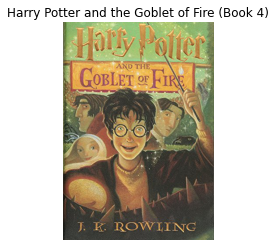

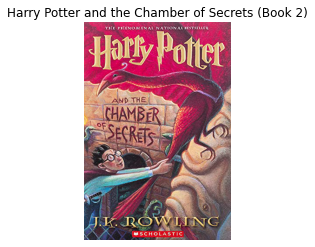

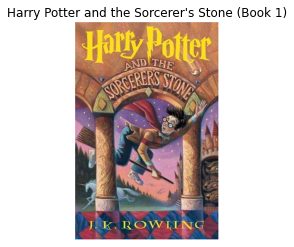

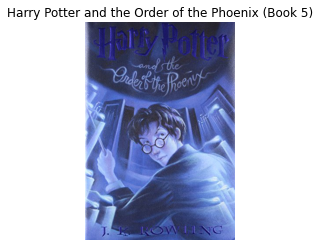

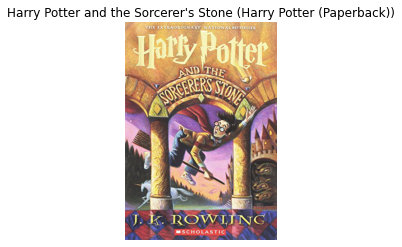

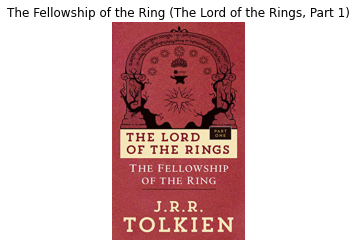

In [ ]:
movie_recommender('Harry Potter and the Prisoner of Azkaban (Book 3)')